## DSC-607: Data Mining
### Module 1 Programming Assignment
**Michael Albers**

**5/15/2022**

---

## Overview
Create Linear Regression Model for predicting human life expectancy ages for developed and developing countries

### Data Set

**Life Expectancy (WHO)**


In [39]:
import warnings
warnings.simplefilter("ignore")

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
%matplotlib inline

In [125]:
import statsmodels.formula.api as smf

### Read CSV file and inspect data

In [43]:
life_exp_df = pd.read_csv('data/Life Expectancy Data.csv')

In [44]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [45]:
# Rename columns
life_exp_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
life_exp_df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [46]:
life_exp_df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [47]:
life_exp_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [48]:
life_exp_df['year'].value_counts()

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: year, dtype: int64

In [49]:
life_exp_2015 = life_exp_df[life_exp_df['year']==2015]

In [50]:
life_exp_2015.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


### Check for missing values

In [51]:
life_exp_2015.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            177
percentage_expenditure               0
hepatitis_b                          9
measles                              0
bmi                                  2
under-five_deaths                    0
polio                                0
total_expenditure                  181
diphtheria                           0
hiv/aids                             0
gdp                                 29
population                          41
thinness__1-19_years                 2
thinness_5-9_years                   2
income_composition_of_resources     10
schooling                           10
dtype: int64

In [52]:
life_exp_2015.drop('alcohol', axis=1, inplace=True)

In [53]:
life_exp_2015.drop('total_expenditure', axis=1, inplace=True)

In [54]:
life_exp_2015.isnull().sum()

country                             0
year                                0
status                              0
life_expectancy                     0
adult_mortality                     0
infant_deaths                       0
percentage_expenditure              0
hepatitis_b                         9
measles                             0
bmi                                 2
under-five_deaths                   0
polio                               0
diphtheria                          0
hiv/aids                            0
gdp                                29
population                         41
thinness__1-19_years                2
thinness_5-9_years                  2
income_composition_of_resources    10
schooling                          10
dtype: int64

In [55]:
life_exp_2015.dropna(inplace=True)

### Life Expectancy
- Display Descriptive Statistics
- Determine whether Life Expectency follows a normal distribution

In [56]:
life_exp_2015['life_expectancy'].describe()

count    130.000000
mean      70.741538
std        7.997381
min       51.000000
25%       65.725000
50%       72.150000
75%       76.025000
max       85.000000
Name: life_expectancy, dtype: float64

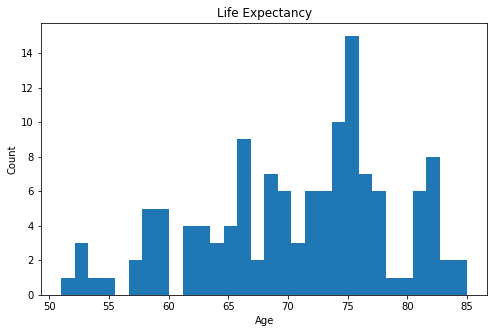

In [57]:
plt.figure(figsize=[8,5])
plt.hist(data=life_exp_2015, x='life_expectancy', bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Life Expectancy")
plt.show()

> The life expectancy is somewhat normal for ages above 60

In [58]:
locations = [1,2]
labels = ['Developed', 'Developing']

In [59]:
avg_life_exp = life_exp_2015.groupby('status').life_expectancy.mean()

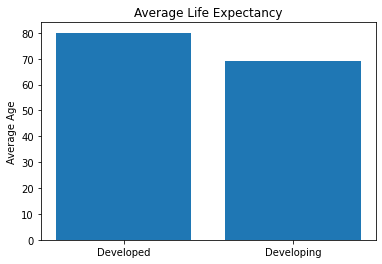

In [60]:
plt.bar(locations, avg_life_exp, tick_label=labels)
plt.title("Average Life Expectancy")
plt.ylabel("Average Age")
plt.show()

### GDP Per Capita
A new GDP per-capita feature will be created to measure a country's wealth

In [61]:
life_exp_2015['gdp_per_capita'] = life_exp_2015['gdp'] / life_exp_2015['population']

### Scatter Plots

#### GDP Per Capita v. Life Expectancy

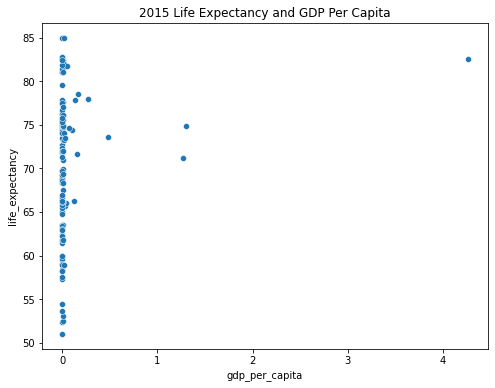

In [62]:
fig = plt.figure(figsize = [8,6])
plt.title('2015 Life Expectancy and GDP Per Capita')
sns.scatterplot(x="gdp_per_capita", y="life_expectancy", data=life_exp_2015)
plt.show()

> The scatter plot shows a few outliers in the data for gdp_per_capita. The gdp_per_capita outliers above one will be removed.

In [63]:
# Remove outliers for gdp_per_capita
gpc_less_one = (life_exp_2015['gdp_per_capita'] <= 1.0)
life_exp_2015_new = life_exp_2015.loc[gpc_less_one,:]

In [132]:
life_exp_2015_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 2922
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          127 non-null    object 
 1   year                             127 non-null    int64  
 2   status                           127 non-null    object 
 3   life_expectancy                  127 non-null    float64
 4   adult_mortality                  127 non-null    float64
 5   infant_deaths                    127 non-null    int64  
 6   percentage_expenditure           127 non-null    float64
 7   hepatitis_b                      127 non-null    float64
 8   measles                          127 non-null    int64  
 9   bmi                              127 non-null    float64
 10  under-five_deaths                127 non-null    int64  
 11  polio                            127 non-null    float64
 12  diphtheria           

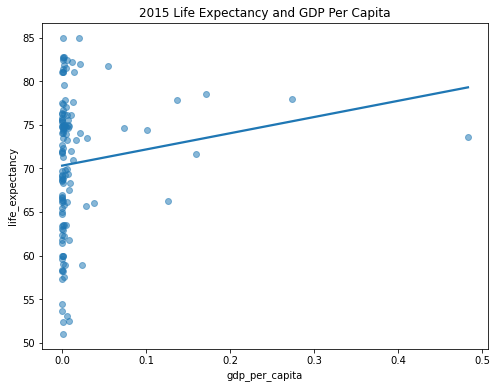

In [135]:
# Scatter plot with outliers removed
fig = plt.figure(figsize = [8,6])
plt.title('2015 Life Expectancy and GDP Per Capita')
sns.scatterplot(x="gdp_per_capita", y="life_expectancy", data=life_exp_2015_new, alpha=0.05)

sns.regplot(x="gdp_per_capita",
         y="life_expectancy",
         data=life_exp_2015_new,
         ci=None,
         scatter_kws={'alpha': 0.5})
plt.show()

> After removing outliers, the GDP per capita is still clustered around zero and the scatter plot does **not** show a strong linear relationship with life expectancy

#### Schooling v. Life Expectancy

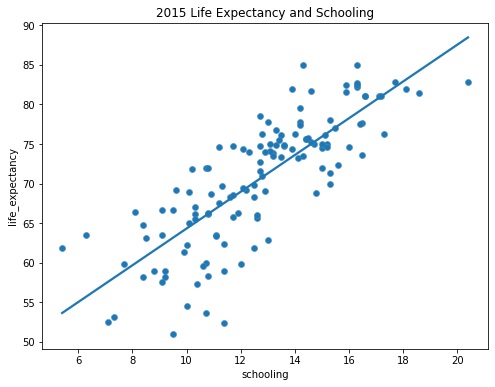

In [65]:
fig = plt.figure(figsize = [8,6])
plt.title('2015 Life Expectancy and Schooling')
sns.scatterplot(x="schooling", y="life_expectancy", data=life_exp_2015_new)

sns.regplot(x="schooling",
         y="life_expectancy",
         data=life_exp_2015_new,
         ci=None,
         scatter_kws={'alpha': 0.5})
plt.show()

### Create Linear Regression Model
Create a linear regression model with **life_expectancy** as the dependent variable. The predictor variables are **gdp_per_capita** and **schooling**

In [126]:
model = smf.ols("life_expectancy ~ gdp_per_capita + schooling", data=life_exp_2015_new)

In [127]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.21e-28
Time:                        11:22:24   Log-Likelihood:                -378.18
No. Observations:                 127   AIC:                             762.4
Df Residuals:                     124   BIC:                             770.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.0943      2.020     20.343      0.000      37.096      45.093
gdp_per_capita    -1.0736      7.811     -0.137      0.891     -16.534      14.386
schooling          2.3235      0.157     14.828      0.000       2.013       2.634
==============================================================================
Omnibus:                        5.861   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.469
Skew:                          -0.497   Prob(JB):                       0.0649
Kurtosis:                       3.211   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> - The regression model shows that GDP per capita is not a significant predictor for life expectancy. This confirms the weak relationship shown by the scatter plot between GDP per capita and life expectancy.
>
> - The model also reveals schooling to be a statistically significant predictor of life expectancy

### Population

Analyze population column which is used to calculate the GDP per capita column. 

- View descriptive statistics
- View histogram for Population.  

In [69]:
life_exp_2015_new['population'].describe()

count    1.270000e+02
mean     1.190576e+07
std      3.047984e+07
min      1.124700e+04
25%      3.023420e+05
50%      2.174645e+06
75%      1.127393e+07
max      2.581621e+08
Name: population, dtype: float64

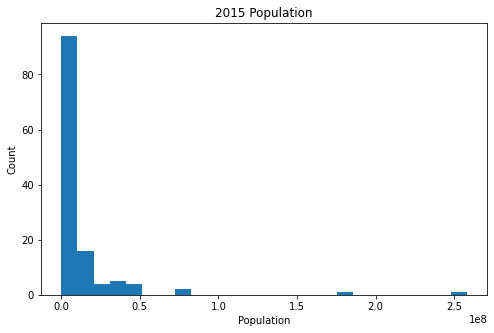

In [70]:
plt.figure(figsize=[8,5])
plt.hist(data=life_exp_2015_new, x='population', bins=25)
plt.xlabel('Population')
plt.ylabel('Count')
plt.title("2015 Population")
plt.show()

> The Population variable is skewed to the right and it has outliers

### GDP
- View descriptive statistics
- Display histogram to see if distribution of data is skewed

In [71]:
life_exp_2015_new['gdp'].describe()

count      127.000000
mean      5691.611257
std       9813.998931
min         33.681223
25%        669.680073
50%       2124.662666
75%       5881.989952
max      56554.387600
Name: gdp, dtype: float64

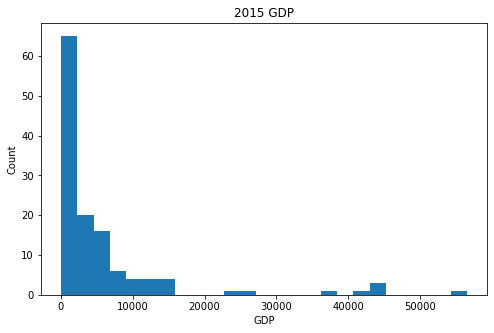

In [72]:
plt.figure(figsize=[8,5])
plt.hist(data=life_exp_2015_new, x='gdp', bins=25)
plt.xlabel('GDP')
plt.ylabel('Count')
plt.title("2015 GDP")
plt.show()

> Like the Population variable, GDP is skewed to the right and it has outliers

### Weighted GDP
Since both population and gdp are right-skewed and have outliers, a new weighted GDP variable will be created. The weighted GDP will equal the inverse of the GDP variable so that higher GDP values will be weighted less in the subsequent regression model.

In [74]:
life_exp_2015_new['weighted_gdp'] = 1 / life_exp_2015_new['gdp']

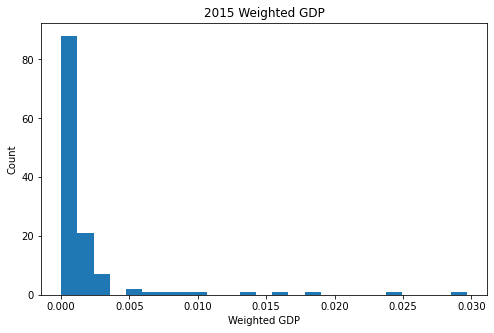

In [101]:
plt.figure(figsize=[8,5])
plt.hist(data=life_exp_2015_new, x='weighted_gdp', bins=25)
plt.xlabel('Weighted GDP')
plt.ylabel('Count')
plt.title("2015 Weighted GDP")
plt.show()

## Second Linear Regression Model
A second linear regression model will use the new **weighted_gdp** variable along with the **schooling** predictor variable

In [128]:
model_2 = smf.ols("life_expectancy ~ weighted_gdp + schooling", data=life_exp_2015_new)

In [130]:
results_2 = model_2.fit()

In [131]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.19e-28
Time:                        11:23:17   Log-Likelihood:                -378.16
No. Observations:                 127   AIC:                             762.3
Df Residuals:                     124   BIC:                             770.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.2693      2.096     19.686      0.000      37.120      45.419
weighted_gdp   -24.9609    102.810     -0.243      0.809    -228.450     178.529
schooling        2.3119      0.158     14.653      0.000       2.000       2.624
==============================================================================
Omnibus:                        5.983   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.608
Skew:                          -0.504   Prob(JB):                       0.0606
Kurtosis:                       3.207   Cond. No.                     3.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The new weighted GDP variable does not improve the model since adjusted R-squared remains the same as 0.64.  The schooling variable is still classified as a statistically significant predictor